In [30]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [12]:
data={"DATA":[294.2,308.5,313.1,317.7,322.7,338.7]}

In [15]:
df=pd.DataFrame(data)

In [16]:
df

,DATA
0,294.2
1,308.5
2,313.1
3,317.7
4,322.7
5,338.7


C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_20572\2023670677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["DATA"])


<Axes: xlabel='DATA', ylabel='Density'>

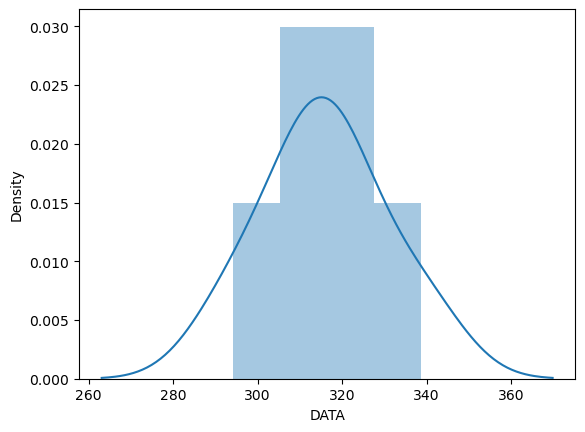

In [32]:
sns.distplot(df["DATA"])

In [20]:
dmean=df["DATA"].mean()

In [21]:
dstd=df["DATA"].std()

In [22]:
df["Z Score"]=(df["DATA"]-dmean)/dstd

In [23]:
df

,DATA,Z Score
0,294.2,-1.455565
1,308.5,-0.492670
2,313.1,-0.182928
3,317.7,0.126815
4,322.7,0.463491
5,338.7,1.540856


In [25]:
df["F0"]=stats.norm.cdf(df["Z Score"])

In [26]:
df

,DATA,Z Score,F0
0,294.2,-1.455565,0.072756
1,308.5,-0.492670,0.311123
2,313.1,-0.182928,0.427427
3,317.7,0.126815,0.550457
4,322.7,0.463491,0.678494
5,338.7,1.540856,0.938324


In [27]:
n=len(df["DATA"])

In [28]:
n

6

In [33]:
df["Fn"]=np.arange(1,n+1)/n

In [34]:
df

,DATA,Z Score,F0,Fn
0,294.2,-1.455565,0.072756,0.166667
1,308.5,-0.492670,0.311123,0.333333
2,313.1,-0.182928,0.427427,0.500000
3,317.7,0.126815,0.550457,0.666667
4,322.7,0.463491,0.678494,0.833333
5,338.7,1.540856,0.938324,1.000000


In [35]:
df["Fn-1"]=np.arange(0,n)/n

In [36]:
df

,DATA,Z Score,F0,Fn,Fn-1
0,294.2,-1.455565,0.072756,0.166667,0.000000
1,308.5,-0.492670,0.311123,0.333333,0.166667
2,313.1,-0.182928,0.427427,0.500000,0.333333
3,317.7,0.126815,0.550457,0.666667,0.500000
4,322.7,0.463491,0.678494,0.833333,0.666667
5,338.7,1.540856,0.938324,1.000000,0.833333


In [41]:
df["D+"]=(df["F0"]-df["Fn"]).abs()

In [38]:
df

,DATA,Z Score,F0,Fn,Fn-1,D+
0,294.2,-1.455565,0.072756,0.166667,0.000000,0.093910
1,308.5,-0.492670,0.311123,0.333333,0.166667,0.022210
2,313.1,-0.182928,0.427427,0.500000,0.333333,0.072573
3,317.7,0.126815,0.550457,0.666667,0.500000,0.116210
4,322.7,0.463491,0.678494,0.833333,0.666667,0.154839
5,338.7,1.540856,0.938324,1.000000,0.833333,0.061676


In [42]:
df["D-"]=(df["F0"]-df["Fn-1"]).abs()

In [43]:
df

,DATA,Z Score,F0,Fn,Fn-1,D+,D-
0,294.2,-1.455565,0.072756,0.166667,0.000000,0.093910,0.072756
1,308.5,-0.492670,0.311123,0.333333,0.166667,0.022210,0.144456
2,313.1,-0.182928,0.427427,0.500000,0.333333,0.072573,0.094094
3,317.7,0.126815,0.550457,0.666667,0.500000,0.116210,0.050457
4,322.7,0.463491,0.678494,0.833333,0.666667,0.154839,0.011827
5,338.7,1.540856,0.938324,1.000000,0.833333,0.061676,0.104991


In [47]:
D= df[["D+","D-"]].max()

In [49]:
D_statistic=D.max()

In [51]:
D_statistic

0.15483942994096156

In [53]:
critical_value=0.519

In [54]:
if D_statistic<critical_value:
    print("Data is from the Normal Distribution")
else:
    print("Data is not from the Normal Distribution")

Data is from the Normal Distribution
